In [1]:
import numpy as np
np.random.seed(1)
from numpy.linalg import cholesky as llt
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
})

In [2]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

def lstsq(A, b):
    M = A.T.dot(A)
    q = A.T.dot(b)
    L = llt(M)
    x = forward_substitution(L, q)
    x = backward_substitution(L.T, x)
    return x, L

In [3]:
def multi_obj_lstsq(As, bs, lambdas):
    k = len(lambdas)
    A_tilde = np.vstack([np.sqrt(lambdas[i]) * As[i] for i in range(k)])

    # stack vectors b horizontally (numpy vectors are by default horizontal)
    b_tilde = np.hstack([np.sqrt(lambdas[i]) * bs[i] for i in range(k)])  
    
    return lstsq(A_tilde, b_tilde)[0]

In [4]:
m, n = 10, 5
A1 = np.random.randn(m, n)
b1 = np.random.randn(m)
A2 = np.random.randn(m, n)
b2 = np.random.randn(m)

N = 200  # Number of lambda points
lambdas = np.logspace(-4, 4, N)
x = np.zeros((n, N))
J1 = np.zeros(N)
J2 = np.zeros(N)

for k in range(N):
    x[:, k] = multi_obj_lstsq([A1, A2], [b1, b2], [1, lambdas[k]])
    J1[k] = np.sum(np.square(A1 @ x[:, k] - b1))
    J2[k] = np.sum(np.square(A2 @ x[:, k] - b2))
    
    
lambda_points = [0.1, 1, 10]
x_points = np.zeros((n, len(lambda_points)))
J1_points = np.zeros(len(lambda_points))
J2_points = np.zeros(len(lambda_points))

for k in range(len(lambda_points)):
    x_points[:, k] = multi_obj_lstsq([A1, A2], [b1, b2], [1, lambda_points[k]])
    J1_points[k] = np.sum(np.square(A1 @ x_points[:, k] - b1))
    J2_points[k] = np.sum(np.square(A2 @ x_points[:, k] - b2))

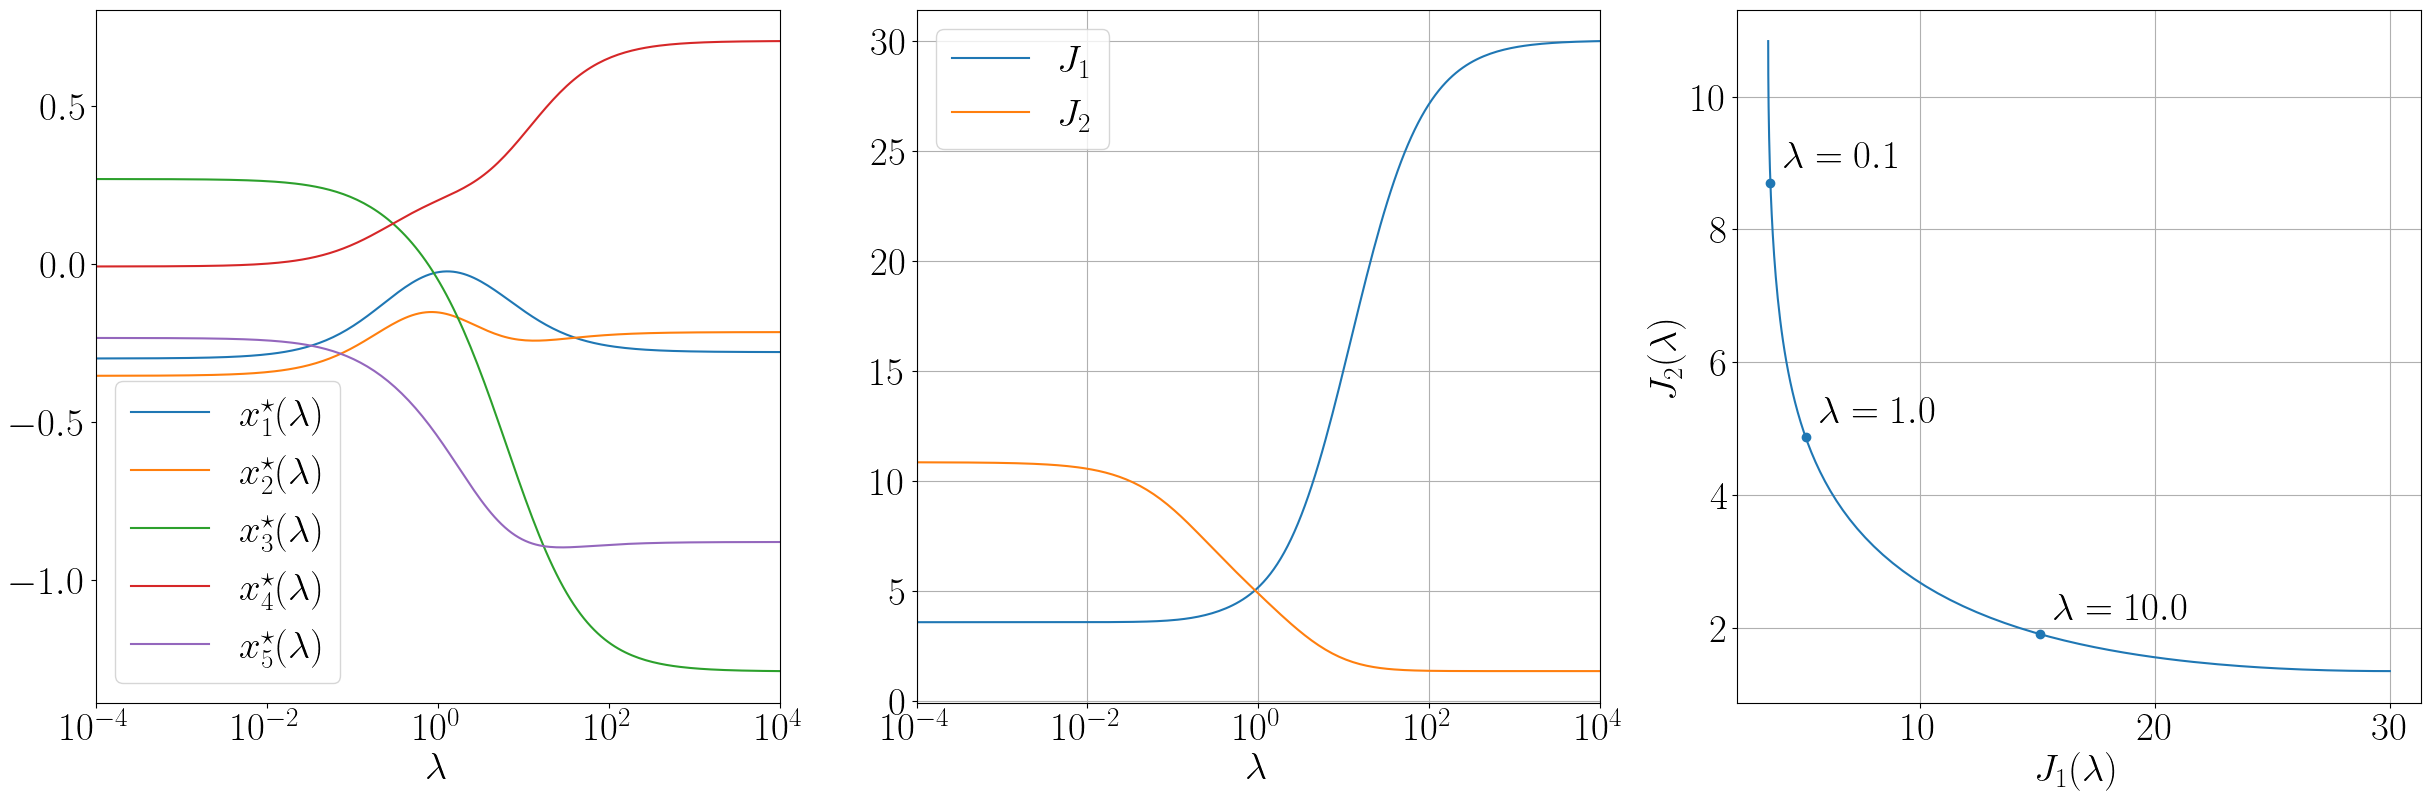

In [5]:
fig, ax = plt.subplots(1,3, figsize=(30, 9))

# plot solution versus lambda
ax[0].plot(lambdas, x.T)
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$\lambda$')
ax[0].set_xlim([1e-4, 1e+4]) 
ax[0].legend([r'$x^\star_{%d}(\lambda)$' % d for d in range(1, n+1)]) 

# plot two objectives versus lambda
ax[1].plot(lambdas, J1) 
ax[1].plot(lambdas, J2)
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$\lambda$')
ax[1].set_xlim([1e-4, 1e+4]) 
ax[1].legend([r'$J_1$', r'$J_2$']) 
ax[1].grid()


# plot two objectives versus lambda
ax[2].plot(J1, J2) 
ax[2].set_xlabel(r'$J_1(\lambda)$')
ax[2].set_ylabel(r'$J_2(\lambda)$')
ax[2].scatter(J1_points, J2_points)
for i, lam in enumerate(lambda_points):
    ax[2].annotate(r'$\lambda=%.1f$' % lam, 
                   (J1_points[i], J2_points[i]),
                   textcoords="offset points", # how to position the text
                   xytext=(10,10), # distance from text to points (x,y)
                  )
ax[2].grid()
plt.savefig('small_example.pdf')